In [1]:
# Importing Core Packages
import pandas as pd #data analysis
import numpy as np #numerical python linear algebra
import csv 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for function calling
import os

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
train.head(10)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [3]:
test = pd.read_csv('test.csv')
test.head(10)

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
5,6,44722,1755,117961,117962,119223,125793,146749,118643,125795
6,7,75834,21135,117961,118343,123494,118054,118054,117887,118055
7,8,4675,3077,117961,118300,120312,124194,124195,118363,124196
8,9,18072,15575,117902,118041,118623,280788,280788,292795,119082
9,10,22680,4474,117961,118446,119064,118321,118448,290919,118322


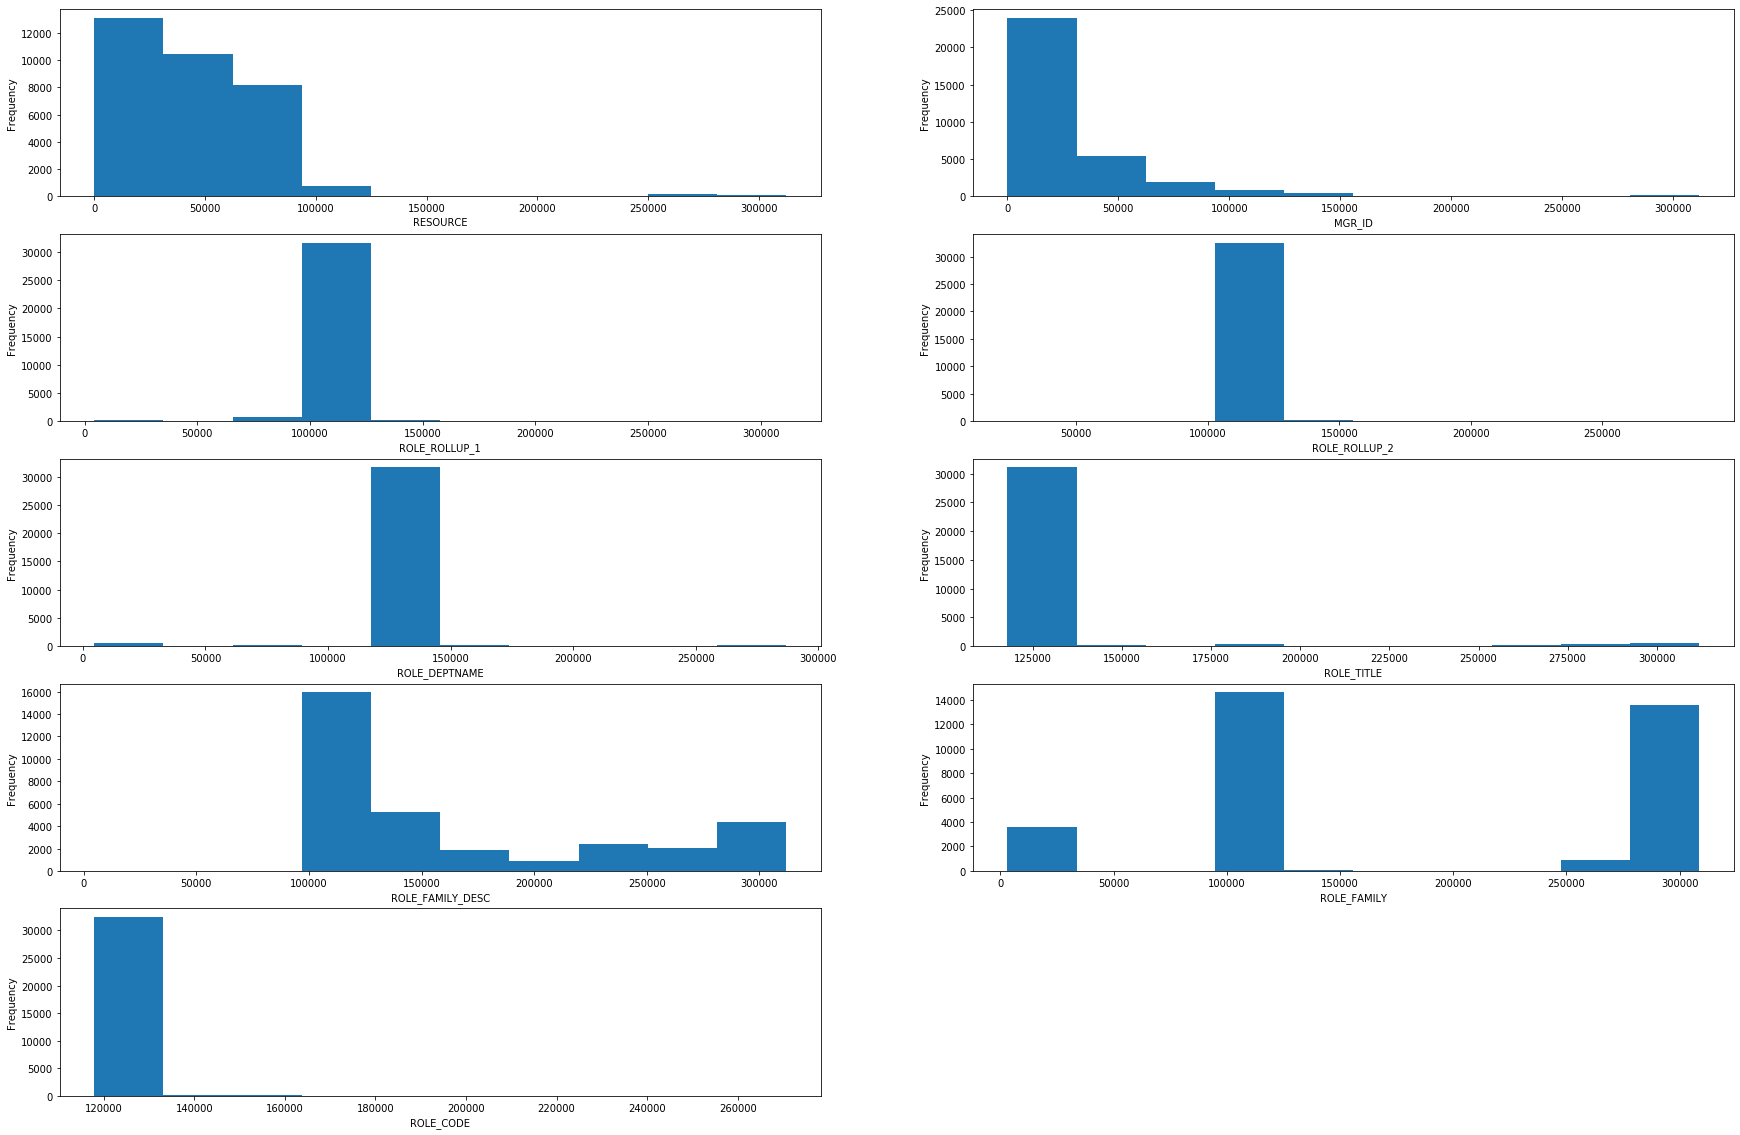

In [4]:
#Plotting Frequecy Graph
plt.figure(figsize=(30,20))
for i in range(1,10):
    plt.subplot(5,2,i)
    plt.hist(train[train.columns[i]])
    plt.xlabel(train.columns[i])
    plt.ylabel("Frequency")
plt.show()

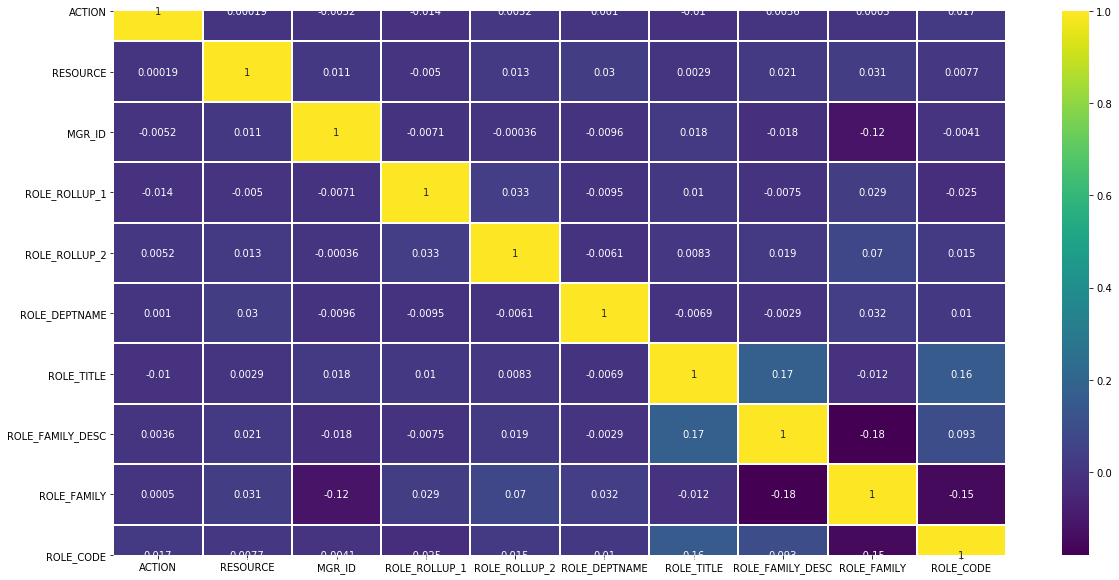

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,cmap='viridis',linewidth=1)

In [6]:
train.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
y = train['ACTION']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ACTION, dtype: int64

In [9]:
x = train.drop(['ACTION'],axis=1)
x.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
#model2 = [DecisionTreeClassifier(), BaggingClassifier()]
model2 = DecisionTreeClassifier()

In [12]:
model2 = model2.fit(X_train,y_train)

In [13]:
pred = model2.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9267622825755264

[Text(199.23329729294935, 214.0425, 'X[2] <= 118004.5\ngini = 0.109\nsamples = 26215\nvalue = [1516, 24699]'),
 Text(93.22084869773425, 207.2475, 'X[6] <= 61276.0\ngini = 0.095\nsamples = 20571\nvalue = [1027, 19544]'),
 Text(59.42623438892957, 200.4525, 'X[1] <= 26999.0\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(59.24430876488474, 193.6575, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(59.6081600129744, 193.6575, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(127.01546300653894, 200.4525, 'X[1] <= 13847.5\ngini = 0.094\nsamples = 20555\nvalue = [1019, 19536]'),
 Text(59.97201126106406, 193.6575, 'X[8] <= 118808.0\ngini = 0.076\nsamples = 11342\nvalue = [446, 10896]'),
 Text(24.374286069631943, 186.8625, 'X[8] <= 118001.5\ngini = 0.09\nsamples = 7536\nvalue = [354, 7182]'),
 Text(11.358981151299032, 180.0675, 'X[6] <= 287488.5\ngini = 0.042\nsamples = 1968\nvalue = [42, 1926]'),
 Text(9.437391747325522, 173.2725, 'X[4] <= 123872.5\ngini = 0.038\nsamples = 1909\nvalue = [

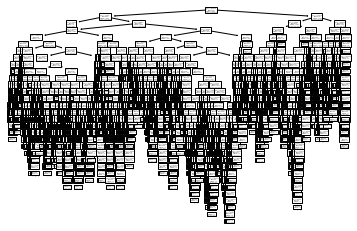

In [15]:
from sklearn import tree
tree.plot_tree(model2)

In [16]:
mport graphviz
dot_data=tree.export_graphviz(model2,out_file = None)
graph = graphviz.Source(dot_data)

ModuleNotFoundError: No module named 'graphviz'

# Bagging Classifier

In [ ]:
test.head()

In [ ]:
test = test.drop(['id'],axis=1)

In [ ]:
test.head()

In [ ]:
list2 = []
bagclass = BaggingClassifier()
bagclass.fit(x,y)
list2.append(bagclass.predict(test))
print(list2[0])

In [ ]:
test['ACTION'] = list2[0].T

In [ ]:
test.head(10)

# End Bagging

In [ ]:
x2 = train.iloc[:50,1:]
x2.head()

In [ ]:
y2 = train.iloc[:50,0:-9]
y2.head()

In [ ]:
model3 = DecisionTreeClassifier()

In [ ]:
model3.fit(x2,y2)

In [ ]:
from sklearn import tree
tree.plot_tree(model3)